In [93]:
import numpy as np


#iniciamos las variables DATO de cada lampara
lampx1=[]
lampy1=[]
lampz1=[]
lampx2=[]
lampy2=[]
lampz2=[]

radio=[]
intensidad_sup=[]
long_lamp=[]
xend=[]
yend=[]
zend=[]

#Inicializamos las variables tipo lista que almacena los valores
#por lampara (lista de listas) 
coord=[]
dist=[]
distaxis=[]
IS=[]
DirectField=[] #para cada lampara
TotalField=[]  #La suma de cada intensidad generada por cada lampara
#TotalField es una lista con la intensidad total para cada coordenada



def setup():
#creamos el vector que guarde tripletes de las coordenadas
    for j in range(0,xend+1):
        for i in range(0,yend+1):
             for k in range(0,zend+1):
                 coord.append((i,j,k))




def distancias(lampx1,lampy1,lampz1,p2):
    distancias=[]
    for i,j,k in coord:
        x1=i-lampx1
        y1=j-lampy1
        z1=k-lampz1  
        p1=x1*x1+y1*y1+z1*z1
        if (p1*p2>0):
                dotprod= (x1*x2+y1*y2+z1*z2)/(np.sqrt(p1*p2))
                a=np.arccos(dotprod)
                d=abs(np.sin(a))*np.sqrt(p1)
        else: 
            d = 0
        distancias.append(d)
    return distancias


def distancia_axis(lampx1,lampy1,lampz1,p2,lampx2,lampy2,lampz2):
    distancias_axis=[]
    for i,j,k in coord:
        x1=i-lampx1
        y1=j-lampy1
        z1=k-lampz1     
        p1=x1*x1+y1*y1+z1*z1
        if (p1*p2>0):
            dotprod= (x1*x2+y1*y2+z1*z2)/(np.sqrt(p1*p2))
            a=np.arccos(dotprod)
            posit1=abs(np.cos(a))*np.sqrt(p1)
        else: 
            posit1 = 0.000001
        x3=i-lampx2
        y3=j-lampy2
        z3=k-lampz2   
        p3=x3*x3+y3*y3+z3*z3
        p4=x2*x3+y2*y3+z2*z3
        if(p2*p3>0):
            dotprod= p4/(np.sqrt(p3*p2))
            a=np.arccos(dotprod)
            posit2=np.cos(a)*np.sqrt(p3)
        else:
            posit2 = 0.000001
        d=max(posit1,posit2)
        distancias_axis.append(d)
    return distancias_axis

def intensidad_directa(IS,long_lamp,radio,dist,distaxis):
    intensidad_directa=[]
    for i in range(len(distaxis)):
        if distaxis[i]<long_lamp:
           tempsum=intensidad(IS[i],long_lamp,radio,dist[i],distaxis[i])
                #entradas: IS, arcl,r,x,h
        else:
            db=distaxis[i]-long_lamp
            tempsum=intensBey(IS[i],long_lamp, radio,dist[i],db)
        intensidad_directa.append(tempsum)
    return intensidad_directa

def intensidad(IS,arcl,r,x,l):
    #IS,arcl,r son datos de la lampara
    #x es la distancia al eje     -   dist
    #l es la distancia en el eje  -   distaxis
    VF1=VFCylinder(l,r,x)
    VF2=VFCylinder(arcl-l,r,x)
    VF=VF1+VF2
    intense=IS*VF
    return  intense



def intensBey(IS,arcl,r,x,db):
    VF1=VFCylinder(arcl+db,r,x)
    VF2=VFCylinder(db,r,x)
    VF=VF1-VF2
    intense = np.fabs(VF*IS)
    return intense




def VFCylinder(l, r, h):
    # l= distaxis, r=radius, h=dist
    if(h<r):
        h=r+0.000001 #siempre esta afuera del foco
    H=h/r
    L=l/r
    if(L==0):
        L=0.000001
    if(H==1):
        H=H+0.000001
    X=(1+H)*(1+H)+L*L
    Y=(1-H)*(1-H)+L*L
    a=np.arctan(L/np.sqrt(H*H-1))/L
    b=(X-2*H)*np.arctan(np.sqrt((X/Y)*(H-1)/(H+1)))/np.sqrt(X*Y)
    c=np.arctan(np.sqrt((H-1)/(H+1)))
    VF=L*(a+b-c)/np.pi*H 
    return VF

def IS_calc(dist,radio,intensidad_sup):
    iscalc=[]
    for i in dist:
        b=i
        if (i<=radio):
            b=radio+0.0001
        iscalc.append(intensidad_sup*(100/b)**2)
    return iscalc

def promedio():
    total=0
    for i in TotalField:
        total=total+i
    prom=total/len(coord)
    return prom


print('-------------------------------------------------------')
print('****Software de calculo de dosis en un sistema UVGI****')
print('-------------------------------------------------------')
print('Se realiza el computo del campo de intensidades directas')
print('de un equipo de esterilizacion con lamparas UVC')
print('utilizando el metodo de View Factor')
print('--------------------------------------------------------\n')

print('Se necesitan los siguientes parametros\n')
print('Numero de lamparas del sistema: ')
n=int(input())
print('Se debe introducir las coordenadas donde inicia y finaliza ')
print('la posicion de cada lampara')

for i in range(n):
    print('Lampara %d' % (i+1))
    print('Coordenada x de inicio')
    lampx1.append(int(input()))
    print('Coordenada y de inicio')
    lampy1.append(int(input()))
    print('Coordenada z de inicio')
    lampz1.append(int(input()))
    print('Coordenada x final')
    lampx2.append(int(input()))
    print('Coordenada y final')
    lampy2.append(int(input()))
    print('Coordenada z final')
    lampz2.append(int(input()))
    print('Radio de la lampara')
    radio.append(float(input()))
    print('Longitud de la lampara')
    long_lamp.append(float(input()))
    print('Rating en microW/cm2')
    intensidad_sup.append(float(input()))

print('-----------------------------------------------\n \n')
print('-----------------------------------------------\n \n')
print('El sistema esta diseñado para geometrias rectangulares ')
print("Ancho en cm 'x'")
xend=int(input())
print("Alto en cm 'y'")
yend=int(input())
print("Largo en cm 'z'")
zend=int(input())


#En esta seccion, se procede al calculo de la intensidad
#direccta para todo el sistema.

setup() #creamos el espacio tridimensional unico para el sistema

for i in range(n):
    #calculamos las distancias a cada lampara
    x2=lampx2[i]-lampx1[i]
    y2=lampy2[i]-lampy1[i]
    z2=lampz2[i]-lampz1[i]
    p2=x2*x2+y2*y2+z2*z2
    dist.append(distancias(lampx1[i],lampy1[i],lampz1[i],p2))
    distaxis.append(distancia_axis(lampx1[i],lampy1[i],lampz1[i],p2,lampx2[i],lampy2[i],lampz2[i])) 
    IS.append(IS_calc(dist[i],radio[i],intensidad_sup[i]))
    DirectField.append(intensidad_directa(IS[i],long_lamp[i],radio[i],dist[i],distaxis[i]))            

TotalField=[]

if n==1:
    TotalField=DirectField[0]
else:
    for i in range(len(DirectField[0])):
        a=0
        for j in range(n):
            k=a+DirectField[j][i]
            a=k
        TotalField.append(a)
        
        
print('promedio')        
print(promedio())

-------------------------------------------------------
****Software de calculo de dosis en un sistema UVGI****
-------------------------------------------------------
Se realiza el computo del campo de intensidades directas
de un equipo de esterilizacion con lamparas UVC
utilizando el metodo de View Factor
--------------------------------------------------------

Se necesitan los siguientes parametros

Numero de lamparas del sistema: 
2
Se debe introducir las coordenadas donde inicia y finaliza 
la posicion de cada lampara
Lampara 1
Coordenada x de inicio
0
Coordenada y de inicio
0
Coordenada z de inicio
0
Coordenada x final
0
Coordenada y final
0
Coordenada z final
10
Radio de la lampara
1.1
Longitud de la lampara
10
Rating en microW/cm2
100
Lampara 2
Coordenada x de inicio
5
Coordenada y de inicio
5
Coordenada z de inicio
0
Coordenada x final
5
Coordenada y final
5
Coordenada z final
10
Radio de la lampara
1.1
Longitud de la lampara
10
Rating en microW/cm2
100
----------------------

In [94]:
TotalField=[]
print(n)
if n==1:
    TotalField=DirectField[0]
else:
    for i in range(len(DirectField[0])):
        a=0
        for j in range(n):
            k=a+DirectField[j][i]
            a=k
        TotalField.append(a)

2


In [95]:
S=[]
def killrate():
    kV = 0.117/100   #constante virus cm2/microW.s
#Calculamos el tiempo que llevaria matar al 99% del virus con la irradiación promedio 
    t=float(input('Tiempo de exposición en segundos: '))
    for a in TotalField:
        S.append(100*(1-np.exp(-1*kV*a*t)))
       
killrate()

RateKill=S

Tiempo de exposición en segundos: 0.001


Plano Frontal, Corte en X: 
15


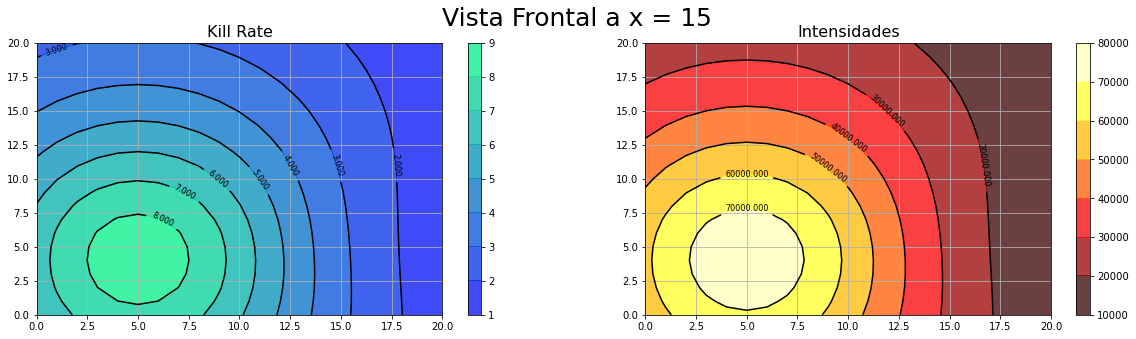

In [96]:
#Para explorar los resultados, es conveniente recuperar el vector de datos DirectField para
#cada plano de intersección
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

  
#Vista Frontal
#En la vista frontal X es un valor constante
#Z ocupa el valor de x y Y continúa siendo y
print('Plano Frontal, Corte en X: ')
planox=int(input()) # Corte en el medio

Z=[] #Los  valores recuperados en orden
Z1=[]  #DirectField
for n in range(len(coord)):
    i,j,k = coord[n]
    if (i==planox):
        Z.append(RateKill[n])
        Z1.append(TotalField[n])  
        
X=np.arange(0,zend+1,1)
Y=np.arange(0,yend+1,1)
Z=np.reshape(Z,(yend+1,zend+1))
Z1=np.reshape(Z1,(yend+1,zend+1))

a=plt.figure(figsize=(20,5))
a.suptitle('Vista Frontal a x = '+str(planox), fontsize=25)
plt.subplot(1,2,1)
h = plt.contourf(X,Y,Z, 7, alpha=.75, cmap=plt.cm.winter)
plt.colorbar()
contours = plt.contour(X, Y, Z, 7, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Kill Rate',fontsize=16)
plt.grid()

plt.subplot(1,2,2)
h = plt.contourf(X,Y,Z1, 7, alpha=.75, cmap=plt.cm.hot)
plt.colorbar()
contours = plt.contour(X, Y, Z1, 7, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Intensidades',fontsize=16)
plt.grid()

Plano Lateral, Corte en Z: 
5


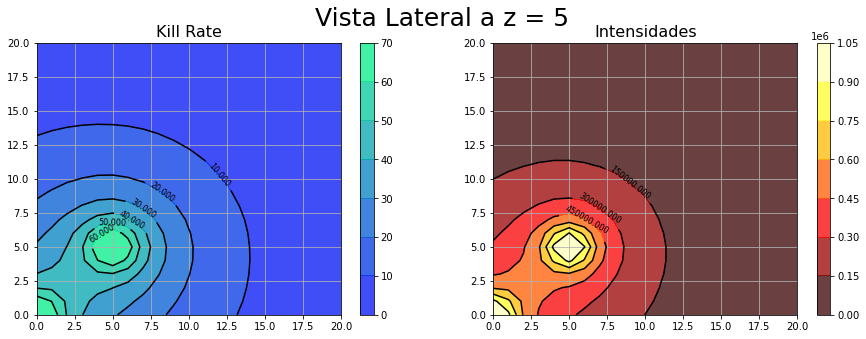

In [100]:
#Para una vista lateral Z es un plano constante
#el valor x e y siguen siendo iguales
print('Plano Lateral, Corte en Z: ')
planoz=int(input()) # Corte en el medio

Z=[]
Z1=[]

for n in range(len(coord)):
    i,j,k = coord[n]
    if (k==planoz):
        Z.append(RateKill[n])
        Z1.append(TotalField[n])
        
X=np.arange(0,xend+1,1)
Y=np.arange(0,yend+1,1)
Z=np.reshape(Z,(xend+1,yend+1))
Z1=np.reshape(Z1,(xend+1,yend+1))

a=plt.figure(figsize=(15,5))
a.suptitle('Vista Lateral a z = '+str(planoz), fontsize=25)

plt.subplot(1,2,1)
h = plt.contourf(X,Y,Z, 7, alpha=.75, cmap=plt.cm.winter)
plt.colorbar()
contours = plt.contour(X, Y, Z,7, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Kill Rate',fontsize=16)
plt.grid()


plt.subplot(1,2,2)
h = plt.contourf(X,Y,Z1, 7, alpha=.75, cmap=plt.cm.hot)
plt.colorbar()
contours = plt.contour(X, Y, Z1, 7, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Intensidades',fontsize=16)
plt.grid()


Plano Superior, Corte en Y: 
7


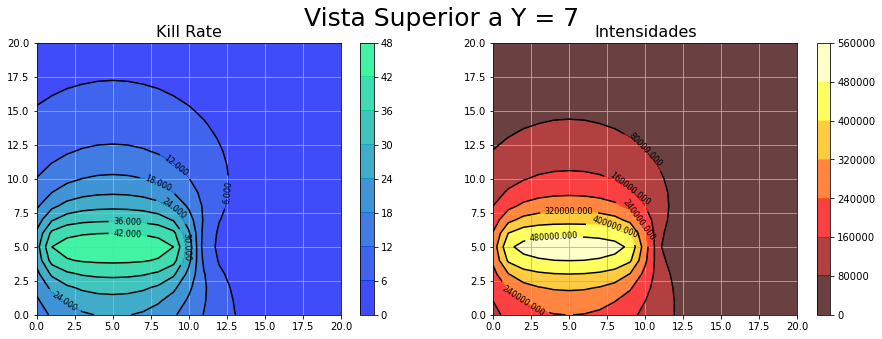

In [106]:
#Para una vista Superior, Y es un plano constante
#x es z 
#y es x

print('Plano Superior, Corte en Y: ')
planoy=int(input()) # Corte en el medio

Z=[]
Z1=[]

for n in range(len(coord)):
    i,j,k = coord[n]
    if (j==planoy):
        Z.append(RateKill[n])
        Z1.append(TotalField[n])
        
X=np.arange(0,zend+1,1)
Y=np.arange(0,xend+1,1)
Z=np.reshape(Z,(xend+1,zend+1))
Z1=np.reshape(Z1,(xend+1,zend+1))



a=plt.figure(figsize=(15,5))
a.suptitle('Vista Superior a Y = '+str(planoy), fontsize=25)

plt.subplot(1,2,1)
h = plt.contourf(X,Y,Z, 7, alpha=.75, cmap=plt.cm.winter)
plt.colorbar()
contours = plt.contour(X, Y, Z,7, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Kill Rate',fontsize=16)
plt.grid()


plt.subplot(1,2,2)
h = plt.contourf(X,Y,Z1, 7, alpha=.75, cmap=plt.cm.hot)
plt.colorbar()
contours = plt.contour(X, Y, Z1, 7, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Intensidades',fontsize=16)
plt.grid()
